In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.8.0


In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

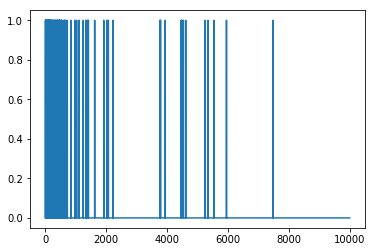

In [3]:
plt.plot(train_data[0])

In [4]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 17s - loss: 0.5039 - acc: 0.7950 - binary_crossentropy: 0.5039 - val_loss: 0.3569 - val_acc: 0.8685 - val_binary_crossentropy: 0.3569
Epoch 2/20
 - 19s - loss: 0.2620 - acc: 0.9071 - binary_crossentropy: 0.2620 - val_loss: 0.2857 - val_acc: 0.8882 - val_binary_crossentropy: 0.2857
Epoch 3/20
 - 10s - loss: 0.1902 - acc: 0.9338 - binary_crossentropy: 0.1902 - val_loss: 0.2865 - val_acc: 0.8868 - val_binary_crossentropy: 0.2865
Epoch 4/20
 - 7s - loss: 0.1516 - acc: 0.9481 - binary_crossentropy: 0.1516 - val_loss: 0.3086 - val_acc: 0.8796 - val_binary_crossentropy: 0.3086
Epoch 5/20
 - 7s - loss: 0.1253 - acc: 0.9580 - binary_crossentropy: 0.1253 - val_loss: 0.3351 - val_acc: 0.8744 - val_binary_crossentropy: 0.3351
Epoch 6/20
 - 6s - loss: 0.1036 - acc: 0.9674 - binary_crossentropy: 0.1036 - val_loss: 0.3669 - val_acc: 0.8705 - val_binary_crossentropy: 0.3669
Epoch 7/20
 - 6s - loss: 0.0858 - acc: 0.9740 - binary_crossentro

In [6]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [7]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 6s - loss: 0.5984 - acc: 0.7734 - binary_crossentropy: 0.5984 - val_loss: 0.4896 - val_acc: 0.8608 - val_binary_crossentropy: 0.4896
Epoch 2/20
 - 7s - loss: 0.3856 - acc: 0.8975 - binary_crossentropy: 0.3856 - val_loss: 0.3576 - val_acc: 0.8809 - val_binary_crossentropy: 0.3576
Epoch 3/20
 - 6s - loss: 0.2761 - acc: 0.9178 - binary_crossentropy: 0.2761 - val_loss: 0.3056 - val_acc: 0.8882 - val_binary_crossentropy: 0.3056
Epoch 4/20
 - 6s - loss: 0.2210 - acc: 0.9308 - binary_crossentropy: 0.2210 - val_loss: 0.2885 - val_acc: 0.8882 - val_binary_crossentropy: 0.2885
Epoch 5/20
 - 6s - loss: 0.1879 - acc: 0.9414 - binary_crossentropy: 0.1879 - val_loss: 0.2866 - val_acc: 0.8856 - val_binary_crossentropy: 0.2866
Epoch 6/20
 - 5s - loss: 0.1641 - acc: 0.9474 - binary_crossentropy: 0.1641 - val_loss: 0.2875 - val_acc: 0.8867 - val_binary_crossentropy: 0.2875
Epoch 7/20
 - 5s - loss: 0.1456 - acc: 0.9547 - binary_crossentropy:

In [8]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [9]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 29s - loss: 0.3446 - acc: 0.8516 - binary_crossentropy: 0.3446 - val_loss: 0.2921 - val_acc: 0.8816 - val_binary_crossentropy: 0.2921
Epoch 2/20
 - 26s - loss: 0.1362 - acc: 0.9500 - binary_crossentropy: 0.1362 - val_loss: 0.3600 - val_acc: 0.8644 - val_binary_crossentropy: 0.3600
Epoch 3/20
 - 27s - loss: 0.0435 - acc: 0.9874 - binary_crossentropy: 0.0435 - val_loss: 0.4337 - val_acc: 0.8690 - val_binary_crossentropy: 0.4337
Epoch 4/20
 - 27s - loss: 0.0072 - acc: 0.9991 - binary_crossentropy: 0.0072 - val_loss: 0.5974 - val_acc: 0.8708 - val_binary_crossentropy: 0.5974
Epoch 5/20
 - 27s - loss: 8.0294e-04 - acc: 1.0000 - binary_crossentropy: 8.0294e-04 - val_loss: 0.6780 - val_acc: 0.8707 - val_binary_crossentropy: 0.6780
Epoch 6/20
 - 26s - loss: 2.3390e-04 - acc: 1.0000 - binary_crossentropy: 2.3390e-04 - val_loss: 0.7165 - val_acc: 0.8712 - val_binary_crossentropy: 0.7165
Epoch 7/20
 - 26s - loss: 1.4394e-04 - acc: 1.

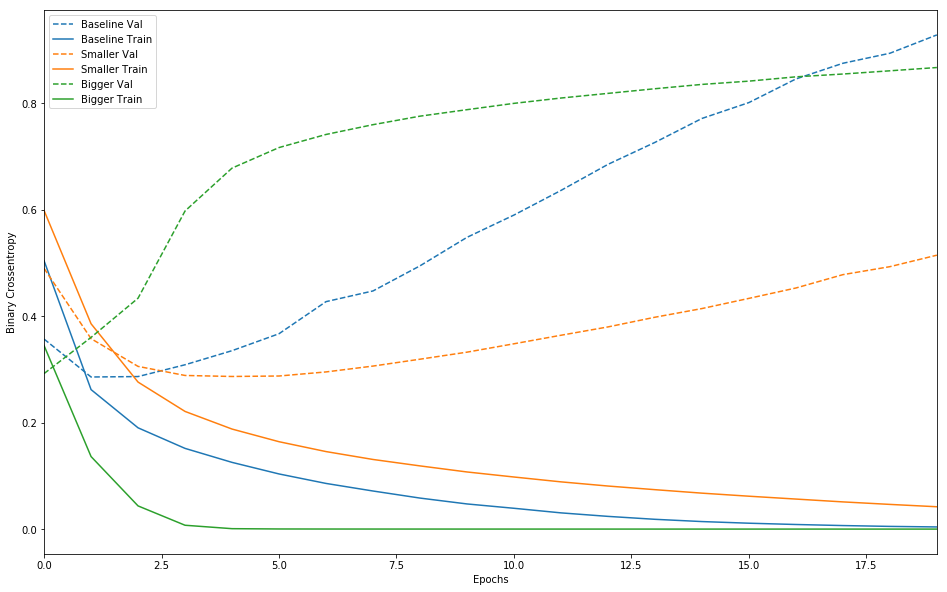

In [10]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [11]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 15s - loss: 0.4994 - acc: 0.8199 - binary_crossentropy: 0.4582 - val_loss: 0.3663 - val_acc: 0.8804 - val_binary_crossentropy: 0.3233
Epoch 2/20
 - 13s - loss: 0.2924 - acc: 0.9133 - binary_crossentropy: 0.2456 - val_loss: 0.3330 - val_acc: 0.8883 - val_binary_crossentropy: 0.2834
Epoch 3/20
 - 7s - loss: 0.2469 - acc: 0.9327 - binary_crossentropy: 0.1950 - val_loss: 0.3384 - val_acc: 0.8856 - val_binary_crossentropy: 0.2847
Epoch 4/20
 - 6s - loss: 0.2236 - acc: 0.9421 - binary_crossentropy: 0.1684 - val_loss: 0.3531 - val_acc: 0.8816 - val_binary_crossentropy: 0.2968
Epoch 5/20
 - 6s - loss: 0.2121 - acc: 0.9484 - binary_crossentropy: 0.1542 - val_loss: 0.3659 - val_acc: 0.8786 - val_binary_crossentropy: 0.3070
Epoch 6/20
 - 6s - loss: 0.1996 - acc: 0.9528 - binary_crossentropy: 0.1401 - val_loss: 0.3818 - val_acc: 0.8748 - val_binary_crossentropy: 0.3218
Epoch 7/20
 - 7s - loss: 0.1935 - acc: 0.9557 - binary_crossentrop

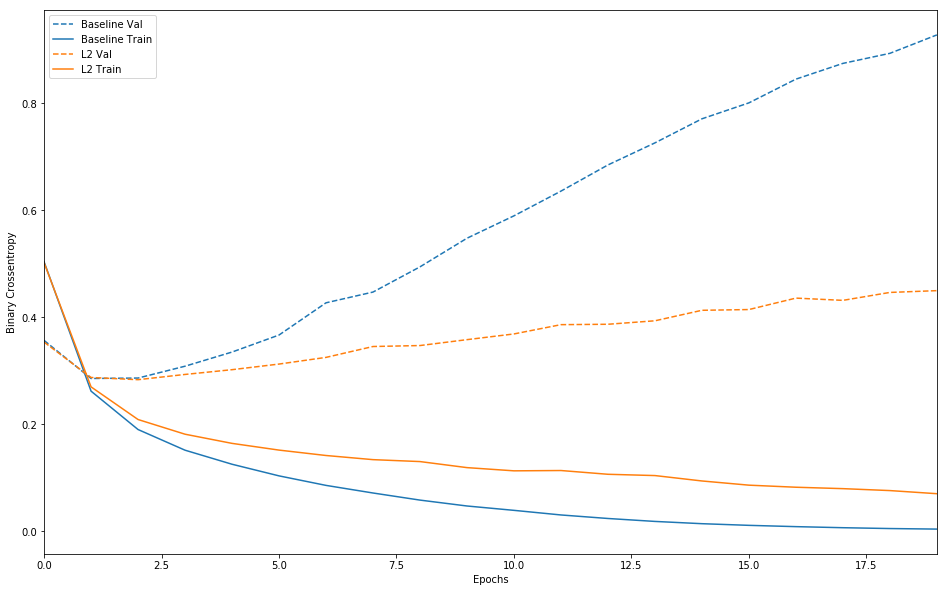

In [14]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [15]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 11s - loss: 0.6220 - acc: 0.6458 - binary_crossentropy: 0.6220 - val_loss: 0.4770 - val_acc: 0.8515 - val_binary_crossentropy: 0.4770
Epoch 2/20
 - 7s - loss: 0.4664 - acc: 0.7873 - binary_crossentropy: 0.4664 - val_loss: 0.3421 - val_acc: 0.8807 - val_binary_crossentropy: 0.3421
Epoch 3/20
 - 6s - loss: 0.3666 - acc: 0.8511 - binary_crossentropy: 0.3666 - val_loss: 0.2922 - val_acc: 0.8872 - val_binary_crossentropy: 0.2922
Epoch 4/20
 - 6s - loss: 0.3090 - acc: 0.8805 - binary_crossentropy: 0.3090 - val_loss: 0.2747 - val_acc: 0.8902 - val_binary_crossentropy: 0.2747
Epoch 5/20
 - 6s - loss: 0.2668 - acc: 0.9016 - binary_crossentropy: 0.2668 - val_loss: 0.2745 - val_acc: 0.8883 - val_binary_crossentropy: 0.2745
Epoch 6/20
 - 6s - loss: 0.2325 - acc: 0.9126 - binary_crossentropy: 0.2325 - val_loss: 0.2809 - val_acc: 0.8871 - val_binary_crossentropy: 0.2809
Epoch 7/20
 - 6s - loss: 0.2037 - acc: 0.9248 - binary_crossentropy

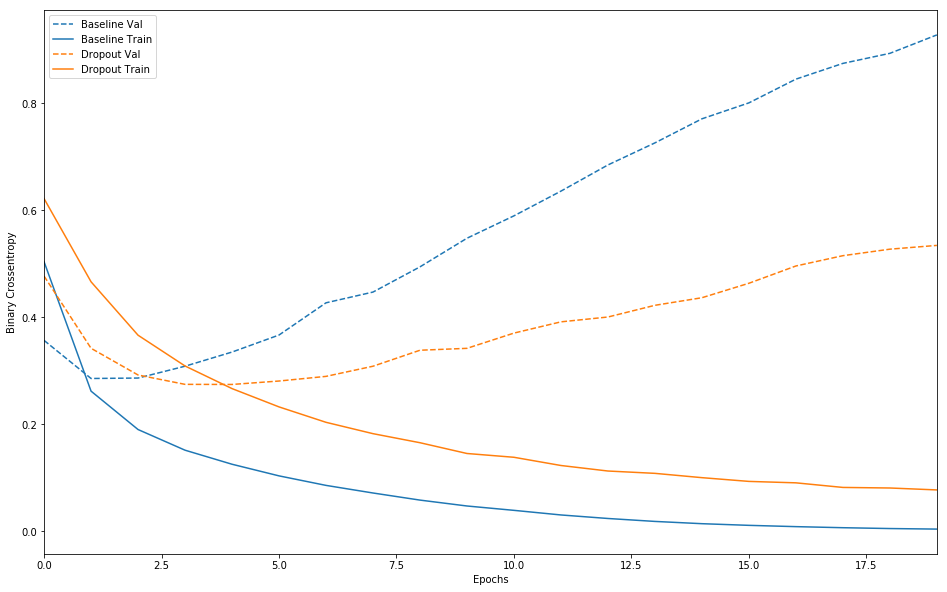

In [16]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])